In [3]:
# === IMPORT LIBRARY ===
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    InputLayer, Conv2D, MaxPool2D, Flatten, Dense,
    Dropout, BatchNormalization
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from google.colab import drive

In [4]:
# === MOUNT GOOGLE DRIVE ===
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# === LOAD DATASET ===
imagePaths = '/content/drive/MyDrive/Data/DatasetDaun'
label_list = ['Nangka', 'Daun Sirih']
data, labels = [], []

for label in label_list:
    image_dir = f"{imagePaths}/{label}/*.jpg"
    print(f"Mencari gambar di: {image_dir}")
    for imagePath in glob.glob(image_dir):
        image = cv2.imread(imagePath)
        if image is None:
            continue  # skip jika gambar rusak
        image = cv2.resize(image, (64, 64))  # ukuran lebih besar
        data.append(image)
        labels.append(label)

data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)


Mencari gambar di: /content/drive/MyDrive/Data/DatasetDaun/Nangka/*.jpg
Mencari gambar di: /content/drive/MyDrive/Data/DatasetDaun/Daun Sirih/*.jpg


In [7]:
# === ENCODE LABEL ===
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print("Label numerik:", labels)

# === SPLIT DATA ===
x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

print("Ukuran train:", x_train.shape)
print("Ukuran test:", x_test.shape)


Label numerik: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Ukuran train: (81, 64, 64, 3)
Ukuran test: (21, 64, 64, 3)


In [9]:
# === SPLIT DATA ===
x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

print("Ukuran train:", x_train.shape)
print("Ukuran test:", x_test.shape)

Ukuran train: (81, 64, 64, 3)
Ukuran test: (21, 64, 64, 3)


In [10]:
# === MODEL CNN OPTIMAL ===
model = Sequential([
    InputLayer(input_shape=(64, 64, 3)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [11]:
# === KOMPILE MODEL ===
opt = Adam(learning_rate=0.0005)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


In [12]:
# === AUGMENTASI DATA ===
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)



In [13]:
# === CALLBACK EARLY STOPPING ===
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [15]:
# === TRAINING ===
H = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_test, y_test),
    epochs=50,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 371ms/step - accuracy: 1.0000 - loss: 0.0156 - val_accuracy: 0.6190 - val_loss: 0.6405
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step - accuracy: 0.9635 - loss: 0.0678 - val_accuracy: 0.6190 - val_loss: 0.7891
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step - accuracy: 0.9737 - loss: 0.2120 - val_accuracy: 0.6190 - val_loss: 1.0045
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 355ms/step - accuracy: 0.9635 - loss: 0.1642 - val_accuracy: 0.6190 - val_loss: 1.2608
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 418ms/step - accuracy: 0.9686 - loss: 0.0839 - val_accuracy: 0.6190 - val_loss: 1.5216
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 607ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.6190 - val_loss: 1.7769
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 535ms/step - accuracy: 0.9877 - loss: 0.1091 - val_accuracy: 0.6190 - val_loss: 2.0053
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step - accuracy: 0.9798 - loss: 0.0656 - val_accuracy: 0.6190 - val_loss:

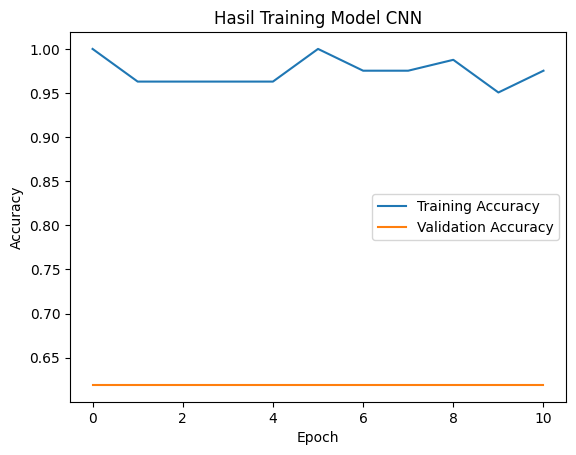

In [16]:
# === GRAFIK AKURASI ===
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Hasil Training Model CNN')
plt.show()

In [17]:
# === EVALUASI MODEL ===
predictions = model.predict(x_test)
predictions = (predictions > 0.5).astype(int)
print(classification_report(y_test, predictions, target_names=label_list))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
              precision    recall  f1-score   support

      Nangka       0.00      0.00      0.00         8
  Daun Sirih       0.62      1.00      0.76        13

    accuracy                           0.62        21
   macro avg       0.31      0.50      0.38        21
weighted avg       0.38      0.62      0.47        21



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step

=== HASIL EVALUASI MODEL ===
              precision    recall  f1-score   support

      Nangka       0.00      0.00      0.00         8
  Daun Sirih       0.62      1.00      0.76        13

    accuracy                           0.62        21
   macro avg       0.31      0.50      0.38        21
weighted avg       0.38      0.62      0.47        21



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x800 with 0 Axes>

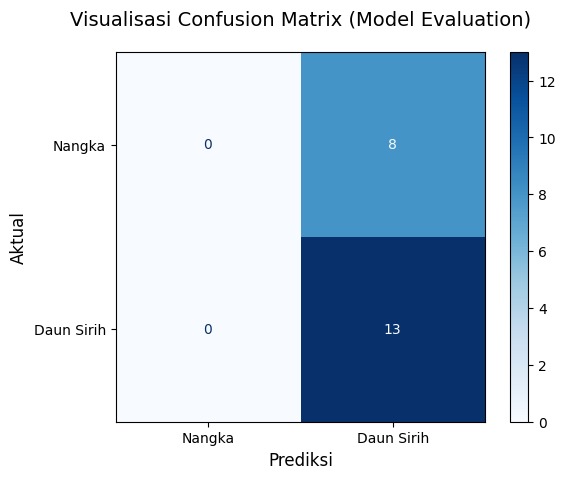

In [23]:
# === EVALUASI MODEL (Versi Mudah Dibaca) ===
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prediksi
predictions = model.predict(x_test)
predictions = (predictions > 0.5).astype(int)

# Tampilkan laporan klasifikasi
print("\n=== HASIL EVALUASI MODEL ===")
print(classification_report(y_test, predictions, target_names=label_list))

# Tampilkan confusion matrix dalam bentuk visual
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 8))  # ukuran gambar diperbesar biar jelas
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_list)
disp.plot(cmap='Blues', values_format='d')
plt.title("Visualisasi Confusion Matrix (Model Evaluation)", fontsize=14, pad=20)
plt.xlabel("Prediksi", fontsize=12)
plt.ylabel("Aktual", fontsize=12)
plt.grid(False)
plt.show()